# HW1: Basic Regression Modeling
_Aim: Predict individual medical costs using regression models._

## Step 1: Import Libraries

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score


## Step 2: Load and Inspect the Data

In [46]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Step 3: Data Preprocessing

In [48]:
df = df.drop('sex', axis=1).drop('region', axis=1).drop('smoker', axis=1)

## Step 4: Exploratory Data Analysis (EDA)

In [49]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [50]:
df.isnull().sum()

,0
age,0
bmi,0
children,0
charges,0


<Axes: xlabel='bmi', ylabel='charges'>

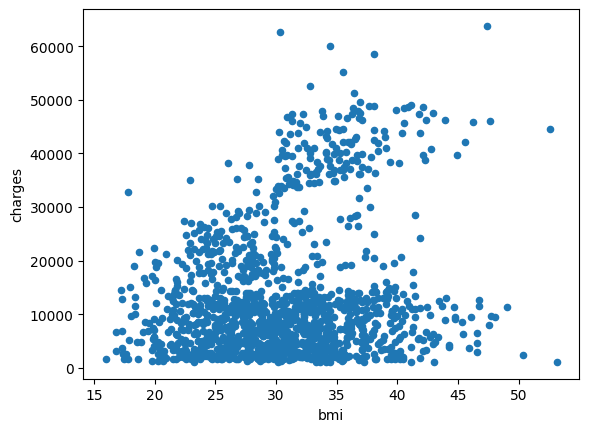

In [51]:
df.plot.scatter("bmi", "charges")

<Axes: xlabel='age', ylabel='charges'>

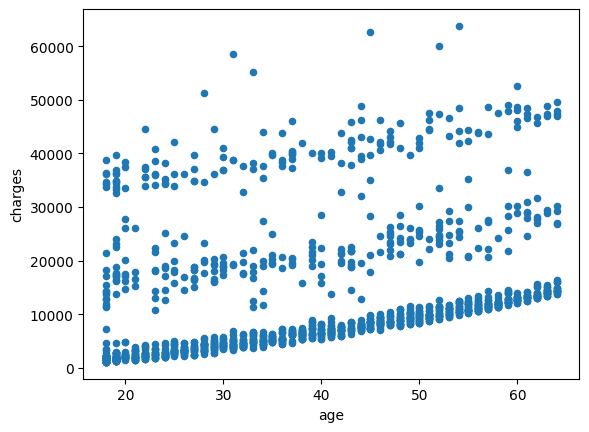

In [52]:
df.plot.scatter("age", "charges")

<Axes: xlabel='children', ylabel='charges'>

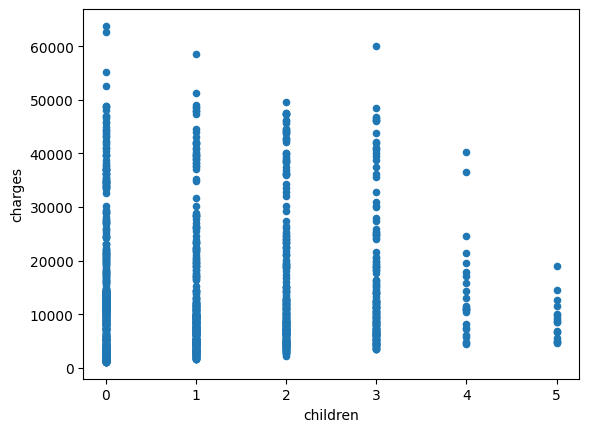

In [53]:
df.plot.scatter("children", "charges")

<Axes: xlabel='children', ylabel='charges'>

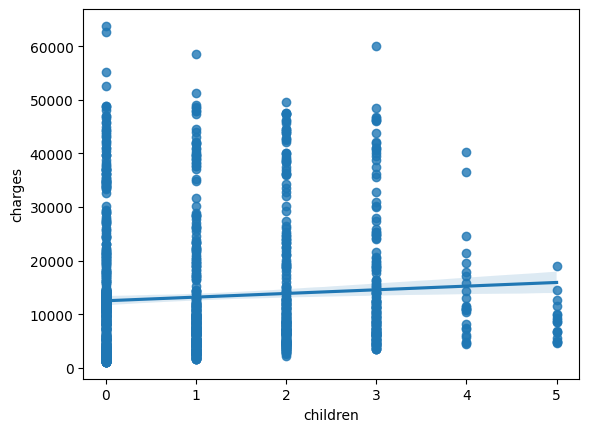

In [54]:
sns.regplot(x="children", y="charges", data=df)

<Axes: xlabel='bmi', ylabel='charges'>

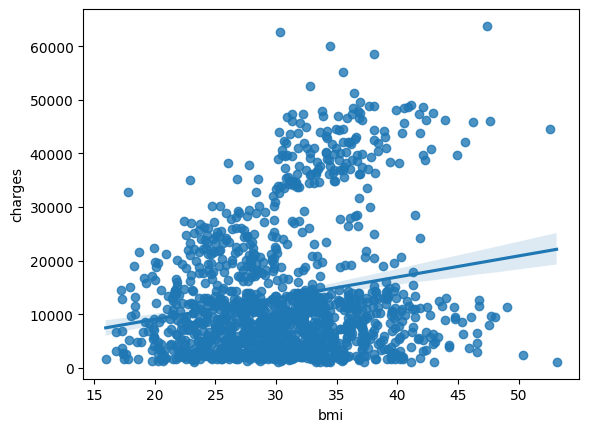

In [55]:
sns.regplot(x="bmi", y="charges", data=df)

<Axes: xlabel='age', ylabel='charges'>

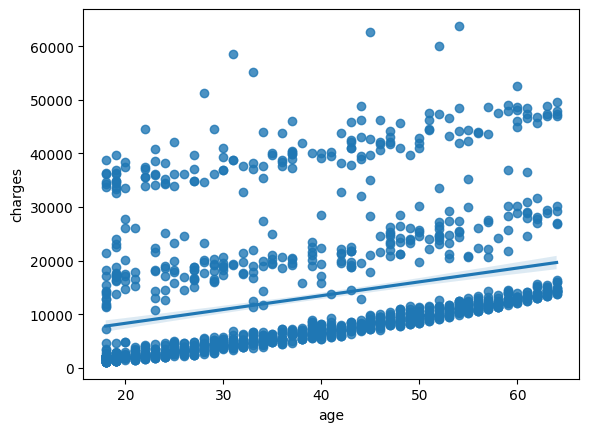

In [56]:
sns.regplot(x="age", y="charges", data=df)

## Step 5: Model Training

In [57]:
y = df["charges"]
X = df.drop("charges", axis=1)

In [58]:
len(y)

1338

In [59]:
len(X)

1338

In [60]:
X

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [61]:
from sklearn.preprocessing import MinMaxScaler

def scale_feats(data):
    scaler = MinMaxScaler()
    scaled_array = scaler.fit_transform(data)
    return pd.DataFrame(scaled_array, columns=data.columns)

In [62]:
X = scale_feats(X)

In [63]:
X

,age,bmi,children
0,0.021739,0.321227,0.0
1,0.000000,0.479150,0.2
2,0.217391,0.458434,0.6
3,0.326087,0.181464,0.0
4,0.304348,0.347592,0.0
...,...,...,...
1333,0.695652,0.403820,0.6
1334,0.000000,0.429379,0.0
1335,0.000000,0.562012,0.0
1336,0.065217,0.264730,0.0


In [64]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)

LinearRegression()

In [67]:
print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slope:     [10435.82511791 11844.7176918   3343.96536102]
Model intercept: 3180.165001516805


## Step 6: Model Evaluation

In [68]:
predictions = model.predict(X_test)

In [69]:
predictions

array([13579.60976991, 11744.15581209, 17097.38750396, 14656.90672996,
        8492.89824843, 16063.60164235,  5495.86919567, 20609.05790922,
        5872.64492614, 16275.96766304, 10598.4522741 , 14397.70889807,
       10687.86328852, 19948.31209106, 20662.3649346 , 18419.74266959,
       20065.27522329, 17014.83719846, 14053.83966759, 12333.20647187,
       10642.37791326, 15491.95381102,  8008.52991667, 11686.15625974,
       16321.19530206, 16675.38413446, 18807.74408536, 11829.83524075,
       14487.4366078 ,  7698.81167544, 15097.35352381, 17083.52423815,
        9886.68673496,  9180.40025019, 10137.91798244, 16904.06881869,
        7856.40101111, 13962.76962319, 14165.87381365, 14063.62517279,
       10778.90120061,  9660.65048653, 18792.13846715, 15508.96337577,
       14227.08581159, 16827.82973533, 10829.13029294,  9432.25711932,
       17234.64246087, 14614.62559778, 19870.73742705,  8122.233948  ,
       16953.17442623,  6419.37822016, 17686.77656961, 16923.86910073,
      

In [70]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

MAE: 9061.79
MSE: 126742404.75
RMSE: 11257.99
R² Score: 0.135


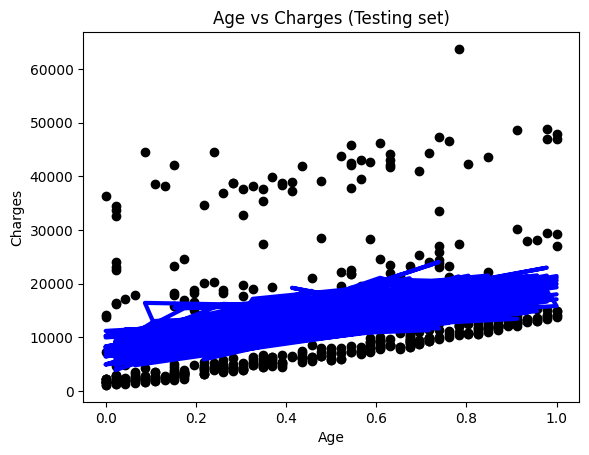

In [71]:
plt.scatter(X_test['age'], y_test, color = 'black')
plt.plot(X_test['age'], model.predict(X_test), color = 'blue', linewidth=3)
plt.title('Age vs Charges (Testing set)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [72]:
X_train

,age,bmi,children
1046,0.543478,0.245359,0.0
682,0.456522,0.520312,0.4
1037,0.586957,0.391041,0.2
490,0.021739,0.455744,0.0
39,0.913043,0.644068,0.0
...,...,...,...
1095,0.000000,0.414044,0.8
1130,0.456522,0.212806,1.0
1294,0.869565,0.247915,0.0
860,0.413043,0.851224,0.4


In [73]:
ddmodel = LinearRegression(fit_intercept=True)

ddX_train = X_train[["bmi"]]

ddmodel.fit(ddX_train, y_train)

LinearRegression()

In [74]:
ddpredictions = ddmodel.predict(ddX_train)

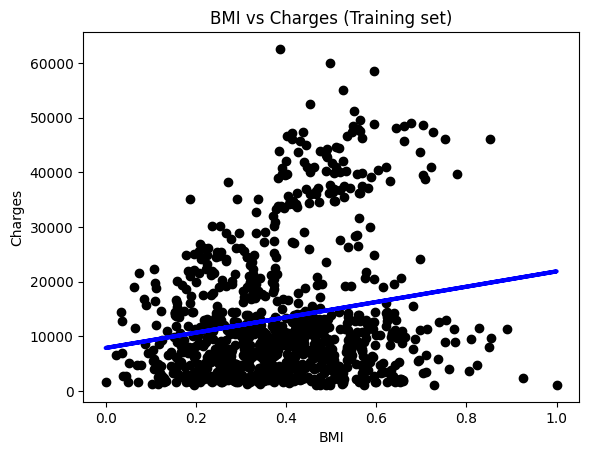

In [75]:
plt.scatter(ddX_train["bmi"], y_train, color="black")  # We use only the column "bmi"
plt.plot(ddX_train["bmi"], ddmodel.predict(ddX_train), color="blue", linewidth=3)
plt.title("BMI vs Charges (Training set)")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

In [76]:
r2_score(y_train, ddpredictions)

0.034703551919134656

## Step 7. Evaluation of BMI-only Model

Using only the `bmi` feature, the linear regression model achieved an R² of approximately 0.035.  
This means the model explains just 3.5% of the variance in medical charges, indicating a very weak predictive power.

This result highlights the importance of using multiple relevant features (e.g., age, children, smoking status) to build a stronger model.


## Conclusion:

- We built a linear regression model to predict medical insurance charges using basic personal attributes.
- The model achieved the following performance on the test set:
  - **MAE**: 9,061.79
  - **MSE**: 126,742,405
  - **RMSE**: 11,257.99
  - **R² Score**: 0.135
- This R² value indicates that the model explains only about 13.5% of the variance, suggesting it captures only a small part of the underlying pattern.
- To improve the model, we could:
  - Include more informative features (e.g., smoking status, region),
  - Apply feature engineering and scaling,
  - Try advanced models such as Ridge, Lasso, or tree-based algorithms.


